<a href="https://colab.research.google.com/github/ibraztech2/Deep-tech-/blob/main/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2 as cv
import time

In [22]:
img  = cv.imread("/content/Copy of tim-mossholder-hOF1bWoet_Q-unsplash.jpg")
gray_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

kernel = torch.randn(3,3)
gray_img = cv.resize(gray_img,(256,86))
gray_img = torch.from_numpy(gray_img)
gray_img = gray_img.to(torch.float32)

In [23]:
gray_img.shape

torch.Size([86, 256])

In [24]:
def output_shape(img,kernel,stride,padding):
  h_in,w_in = img.shape[-2],img.shape[-1]
  k_h,k_w = kernel.shape[0],kernel.shape[1]
  h_out = (h_in - k_h + 2*padding)/stride + 1
  w_out = (w_in - k_w + 2*padding)/stride + 1
  return int(h_out),int(w_out)




In [25]:
gray_img.cuda
kernel.cuda

<function Tensor.cuda>

In [26]:
get_out_shape = output_shape(gray_img,kernel,1,0)
bias = torch.randn(1)
bias = bias.to(torch.float32)
conv_img = torch.zeros(get_out_shape,dtype=torch.float32)

for i in range(get_out_shape[0]):
  for j in range(get_out_shape[1]):
    t_dot = torch.dot(gray_img[i:i+3,j:j+3].flatten(),kernel.flatten())
    t_dot = t_dot + bias
    conv_img[i,j] = t_dot



torch.Size([254, 254])


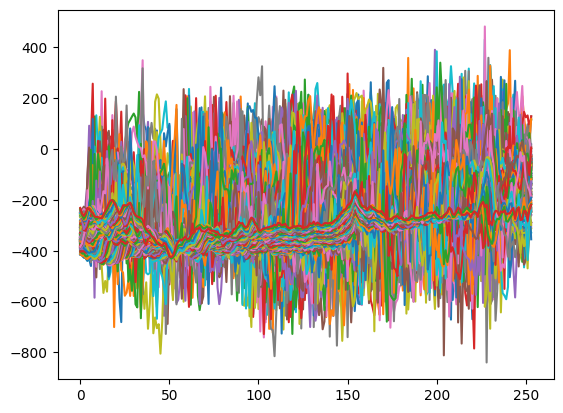

In [20]:
print(conv_img.shape)

In [28]:
import torch.nn as nn
import torch.nn.functional as F
im_gray = gray_img.reshape(1, 1, 86, 256)
kernel = kernel.reshape(1,1,3,3)

# Define the convolution operation
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)

# Set the filter for the convolution operation
kernel=kernel.to(torch.float32)
im_gray = im_gray.to(torch.float32)
print("kernel shape: ", kernel.shape)
conv.weight = nn.Parameter(kernel)
conv.bias = nn.Parameter(bias)
# Apply the convolution operation
outputb  = conv(im_gray)

# Print the output
print('Output Shape :',outputb.shape)
print('Output \n',outputb)

kernel shape:  torch.Size([1, 1, 3, 3])
Output Shape : torch.Size([1, 1, 84, 254])
Output 
 tensor([[[[-154.6901, -161.1789, -166.8451,  ..., -185.7054, -183.7330,
           -175.6420],
          [-186.5125, -184.0876, -181.8142,  ..., -209.7022, -202.2311,
           -194.6868],
          [-211.6842, -202.7747, -208.2687,  ..., -168.0881, -167.5156,
           -175.2016],
          ...,
          [ -62.5750,  -53.2463,  -49.7628,  ..., -183.1499, -211.3119,
           -200.8107],
          [ -92.5296,  -45.2236,  -66.0818,  ..., -196.9178, -199.3760,
           -188.3949],
          [ -54.5860,  -44.1328,  -50.4888,  ..., -210.9111, -204.5478,
           -201.1828]]]], grad_fn=<ConvolutionBackward0>)
